# Task 3 - Regression on the tabular data

You have a dataset (internship_train.csv) that contains 53 anonymized features and a target column. Your task is to build model that predicts a target based on the proposed features. Please provide predictions for internship_hidden_test.csv file. Target metric is RMSE. The main goal is to provide github repository that contains:
*	jupyter notebook with analysis; 
*	code for modeling (Python 3); 
*	file with model predictions; 
*	readme file;
*	requirements.txt file.

# Data Analysis

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [4]:
# read train and test data
train = pd.read_csv("internship_train.csv")
test = pd.read_csv("internship_hidden_test.csv")

In [44]:
train.head()

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,target
0,236,488,16,221,382,97,-4.472136,0.107472,0,132,...,13.340874,0.870542,1.962937,7.466666,11.547794,8.822916,9.046424,7.895535,11.010677,20.107472
1,386,206,357,232,1,198,7.810250,0.763713,1,143,...,12.484882,7.168680,2.885415,12.413973,10.260494,10.091351,9.270888,3.173994,13.921871,61.763713
2,429,49,481,111,111,146,8.602325,0.651162,1,430,...,14.030257,0.394970,8.160625,12.592059,8.937577,2.265191,11.255721,12.794841,12.080951,74.651162
3,414,350,481,370,208,158,8.306624,0.424645,1,340,...,2.789577,6.416708,10.549814,11.456437,6.468099,2.519049,0.258284,9.317696,5.383098,69.424645
4,318,359,20,218,317,301,8.124038,0.767304,1,212,...,1.886560,1.919999,2.268203,0.149421,4.105907,10.416291,6.816217,8.586960,4.512419,66.767304


In [43]:
test.head()

,0,1,2,3,4,5,6,7,8,9,...,43,44,45,46,47,48,49,50,51,52
0,259,388,402,340,156,382,3.316625,0.218760,1,164,...,7.163474,10.227235,0.889111,9.190222,4.670908,0.931525,7.634177,0.158196,13.432551,2.511191
1,441,192,381,421,452,123,-8.888194,0.700228,0,349,...,10.619064,9.339161,4.221861,0.595563,13.865748,0.328453,11.507599,9.107966,1.302407,11.105604
2,83,129,107,156,247,191,2.645751,0.494556,1,297,...,1.819890,10.670237,10.350867,5.134417,5.898995,8.374986,4.638049,3.160023,2.243799,5.073030
3,183,438,191,116,491,403,-6.164414,0.511117,0,272,...,4.168135,12.782579,0.513072,0.321295,11.334062,11.735511,1.911520,8.365676,4.877288,11.601819
4,449,156,310,188,279,465,8.000000,0.756416,1,90,...,7.908122,1.140498,14.165074,7.688796,5.079241,8.152186,1.680403,13.215111,5.823109,1.038015


In [45]:
print(f"Train dataframe shape: {train.shape}")
print(f"Test dataframe shape: {test.shape}")

Train dataframe shape: (90000, 54)
Test dataframe shape: (10000, 53)


In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90000 entries, 0 to 89999
Data columns (total 54 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       90000 non-null  int64  
 1   1       90000 non-null  int64  
 2   2       90000 non-null  int64  
 3   3       90000 non-null  int64  
 4   4       90000 non-null  int64  
 5   5       90000 non-null  int64  
 6   6       90000 non-null  float64
 7   7       90000 non-null  float64
 8   8       90000 non-null  int64  
 9   9       90000 non-null  int64  
 10  10      90000 non-null  int64  
 11  11      90000 non-null  int64  
 12  12      90000 non-null  int64  
 13  13      90000 non-null  float64
 14  14      90000 non-null  float64
 15  15      90000 non-null  float64
 16  16      90000 non-null  float64
 17  17      90000 non-null  float64
 18  18      90000 non-null  float64
 19  19      90000 non-null  float64
 20  20      90000 non-null  float64
 21  21      90000 non-null  float64
 22

Train dataset contains 90000 instances of 53 numerical features and numerical target column

In [12]:
train.isna().sum().sum()

0

In [46]:
test.isna().sum().sum()

0

There are no NaN values in train and test datasets

In [16]:
train['target'].describe() # target column characterization

count    90000.000000
mean        50.033981
std         28.897243
min          0.002634
25%         25.091903
50%         50.030705
75%         75.059454
max         99.999482
Name: target, dtype: float64

In [47]:
train['target'].value_counts()

20.107472    1
34.050755    1
96.583510    1
10.067023    1
40.414667    1
            ..
57.816542    1
50.221324    1
78.668011    1
80.666591    1
59.613207    1
Name: target, Length: 90000, dtype: int64

One may observe that numerical targets are float type that is why the subject of the study will be regression

In [39]:
corr = train.iloc[:,:-1].corr()
fig = px.imshow(corr, height=800, width=800, origin='lower', labels={'color': 'corr'})
fig.update_layout(title='Correlation matrix')
fig.show()

All features are uncorrelated except feature 6 and feature 8

As long as particular features are uncorrelated there is no need to use dimensionality reduction technique as for example Principal Component Analysis for train dataset

In [35]:
train[['6', '8']].corr()

,6,8
6,1.000000,0.940016
8,0.940016,1.000000


In [37]:
train[['6', '8']]

,6,8
0,-4.472136,0
1,7.810250,1
2,8.602325,1
3,8.306624,1
4,8.124038,1
...,...,...
89995,4.898979,1
89996,-3.605551,0
89997,6.164414,1
89998,-3.605551,0


Correlation can be easily observed in dataset

Histograms for features


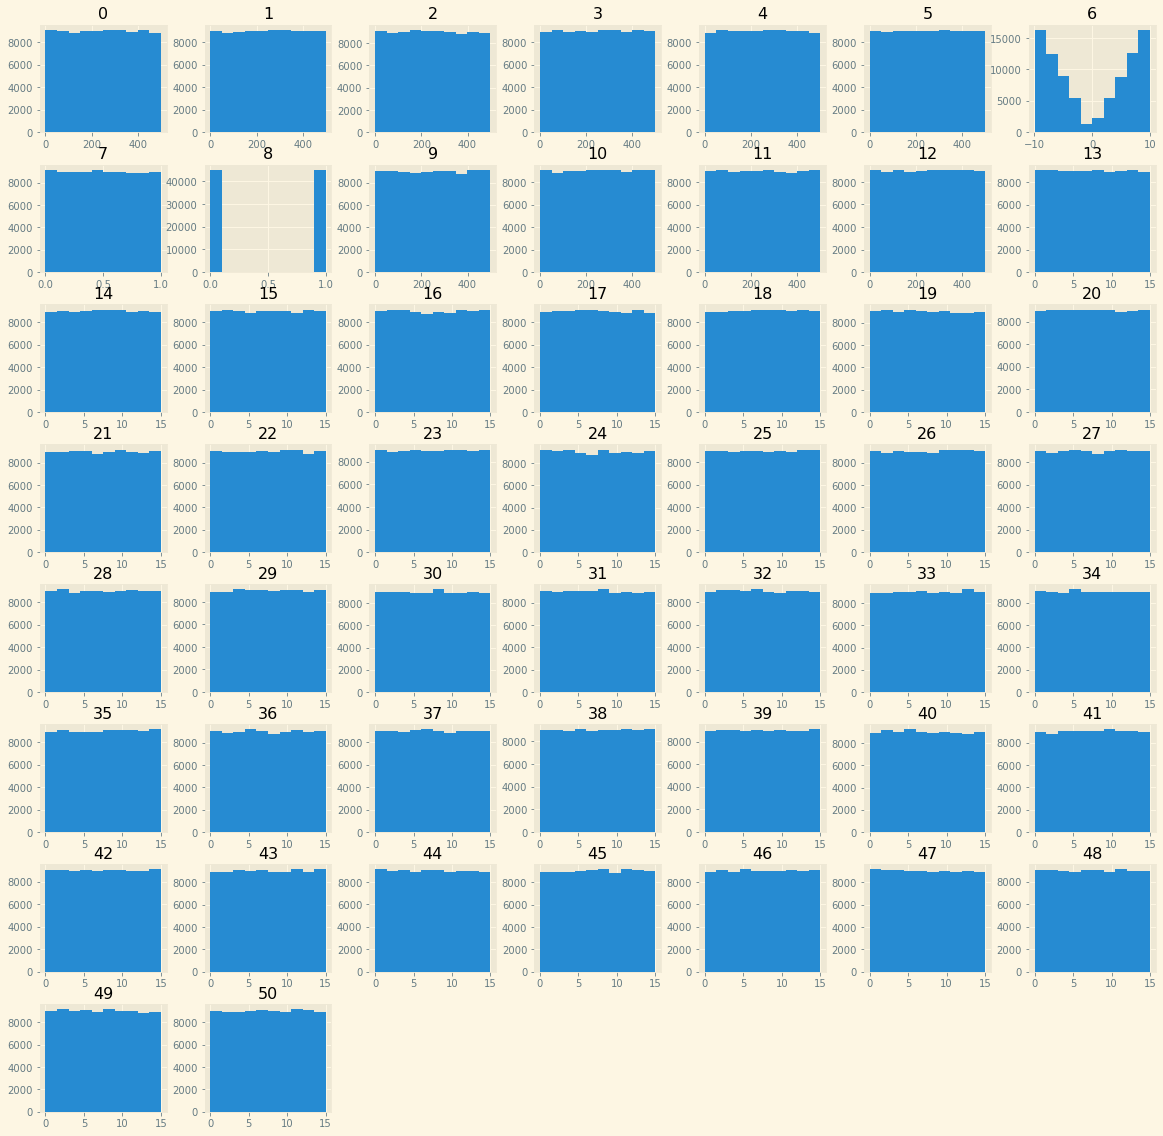

In [84]:
train.iloc[:,[x for x in range(51) if x % 1 == 0]].hist(figsize=(20,20))
print('Histograms for features')

In [78]:
train.iloc[:, :-1].describe().T.round(3)

,count,mean,std,min,25%,50%,75%,max
0,90000.0,249.424,144.336,0.00,125.000,250.000,374.000,499.000
1,90000.0,250.236,144.022,0.00,126.000,251.000,375.000,499.000
2,90000.0,248.637,144.108,0.00,124.000,248.000,374.000,499.000
3,90000.0,249.737,144.285,0.00,125.000,250.000,375.000,499.000
4,90000.0,249.436,143.942,0.00,125.000,250.000,373.000,499.000
5,90000.0,249.656,144.329,0.00,124.000,250.000,374.000,499.000
6,90000.0,-0.011,7.038,-9.95,-7.071,0.000,7.000,9.950
7,90000.0,0.499,0.289,0.00,0.249,0.497,0.748,1.000
8,90000.0,0.499,0.500,0.00,0.000,0.000,1.000,1.000
9,90000.0,249.842,144.613,0.00,124.000,250.000,376.000,499.000


One may observe that:
* majority of values of float features are uniformly distributed and vary from 0 to 15
* majority of values of int features are also uniformly distributed and vary from 0 to 499

# Modeling

In [102]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

In [88]:
train = pd.read_csv("internship_train.csv")
test = pd.read_csv("internship_hidden_test.csv")

In [108]:
RMSE_results = {}

## Normalization and split

In [91]:
X = train.iloc[:,:-1]

''' mean normalization '''
X_norm = (X - X.mean()) / X.std()
X = X_norm.to_numpy()

''' min-max normalization '''
# X_norm = (X - X.min()) / (X.max() - X.min())
# X = X_norm.to_numpy()

y = train.iloc[:,-1].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=111)

## Linear Regression

In [109]:
reg = LinearRegression().fit(X_train, y_train)
predictions = reg.predict(X_test)
RMSE_results['LinReg'] = root_mean_squared_error(y_test, predictions)
RMSE_results['LinReg']

29.017995799230242

## Decision Tree Regression

In [110]:
dtr = DecisionTreeRegressor().fit(X_train, y_train)
predictions = dtr.predict(X_test)
RMSE_results['DTreeReg'] = root_mean_squared_error(y_test, predictions)
RMSE_results['DTreeReg']

0.007724909914331062

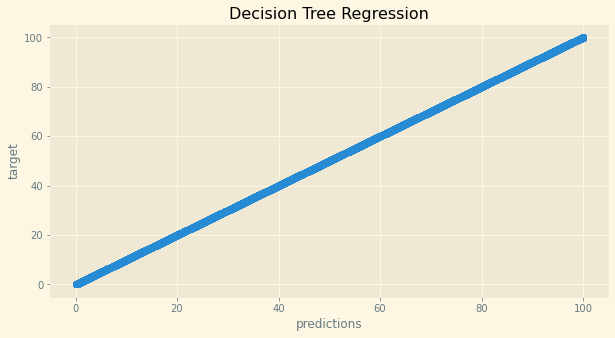

In [107]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,1,1)
ax.scatter(x=predictions, y=y_test)
ax.set(xlabel="predictions", ylabel="target", title="Decision Tree Regression")
plt.show()

In [112]:
RMSE_results

{'LinReg': 29.017995799230242, 'DTreeReg': 0.007724909914331062}